1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Z = 3.4661629670697414


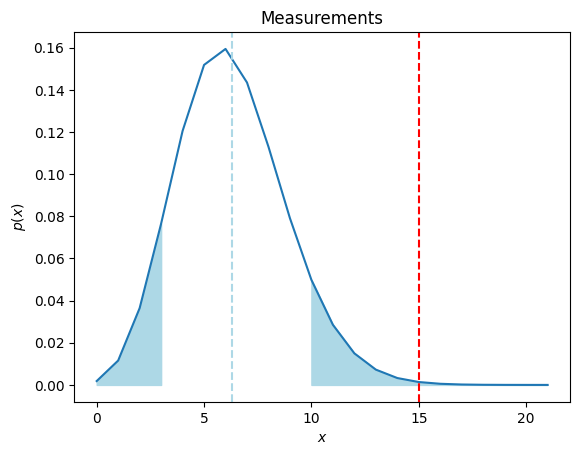

0.0013726297097147906


In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#number of hurricanes in 2005 = 15
#historic average = 6.3
x0 = 15
mu = 6.3

# determine the Z score
Z = abs(x0 - mu) / np.sqrt(mu)
print("Z =", Z)

# plot the measurement and its assumed pdf
xs = np.arange(22)
poisson = stats.poisson.pmf(xs, mu)
plt.plot(xs, poisson)
plt.fill_between(xs, poisson, where=np.abs(xs) < np.abs(Z), color='lightblue')
plt.fill_between(xs, poisson, where=np.abs(xs) > np.abs(Z+6.3), color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

#Z score is larger than 3. Therefore, the probability is statistically significant
#The number of hurricanes in 2005 is significantly different

#To verify, we compute the probability that in a single year are observed 15 or more hurricances.
#we find approximatly 0.0014 which is really small
print(stats.poisson.pmf(k=15, mu=6.3))

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = 10

#calculate the variance
sigma1 = np.sqrt(np.var(pre, ddof=1))
sigma2 = np.sqrt(np.var(post, ddof=1))
#calculate the mean 
mean1 = np.mean(pre)
mean2 = np.mean(post)

# calculate the test statistics
sigma = np.sqrt((sigma1**2 + sigma2**2)/2)
T = (mean1 - mean2)/(sigma*np.sqrt(2/n))
print("T =", T)

#The number of degrees of freedom is ndof = n - 1
#We calculate the p-value:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

#significance level 𝛼 = 0.05
#p-value is < 𝛼, we reject the null hypothesis

T = -3.786997938137629
p-value = 0.004302464132864604


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

7.8222439235810075
21


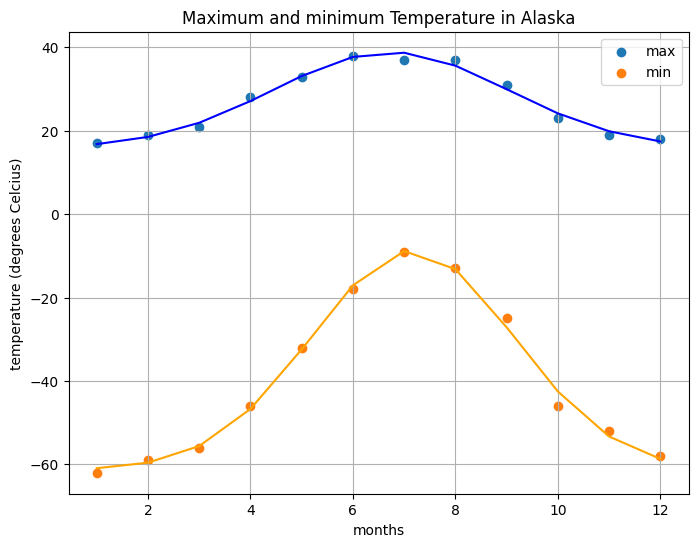

In [3]:
from scipy import optimize
from scipy import stats

maxtemp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
mintemp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

#1 to 12 for each month
x = np.linspace(1, 12, 12)

fig = plt.figure(figsize=(8, 6))
plt.scatter(x, maxtemp,label="max")
plt.scatter(x, mintemp,label="min")
plt.title('Maximum and minimum Temperature in Alaska')
plt.xlabel('months')
plt.ylabel('temperature (degrees Celcius)')
plt.legend(loc='best')
plt.grid()

#we can see that the min and max temperatures can be describe as a gaussian function
#The gaussian function
def func(x, a, offset,x0, sigma ):
    return offset + a*stats.norm.pdf(x, x0, sigma)

#Sigma of the maxtemp and mintemp
sigma_maxtemp = np.sqrt(np.var(maxtemp))
print(sigma_maxtemp)
sigma_mintemp = np.sqrt(np.var(mintemp))

#Amplitude
ampl_maxtemp = abs(maxtemp.max() - maxtemp.min())
print(ampl_maxtemp)
ampl_mintemp = abs(mintemp.max() - mintemp.min())

#Fit the gaussian function to the data
popt_max, pcov_max = optimize.curve_fit(func, x , maxtemp, p0=[ampl_maxtemp, maxtemp.min(), np.mean(x), sigma_maxtemp], full_output=False)
popt_min, pcov_min = optimize.curve_fit(func, x , mintemp, p0=[ampl_mintemp, mintemp.min(), np.mean(x), sigma_mintemp], full_output=False)


#Display the fit
plt.plot(x, func(x, popt_max[0], popt_max[1], popt_max[2], popt_max[3]), color='blue', label='fitted function')
plt.plot(x, func(x, popt_min[0], popt_min[1], popt_min[2], popt_min[3]), color='orange', label='fitted function')

#the fit is reasonable because we can see that the fit follow the scatter plot
#the Offset is equal to the minimum value of the data so we start at the good starting point
#The Offset for the maxtemp and mintemp are not the same because the offset is the minimum value


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

/tmp/ipykernel_10335/3242155094.py:70: RuntimeWarning: divide by zero encountered in divide
  chi2 = np.sum(((h - h_hat)**2) / sigma)


chi2 = inf
p-value = 0.0
R2 = 0.9990305867087671 
R = 0.9995151758271442


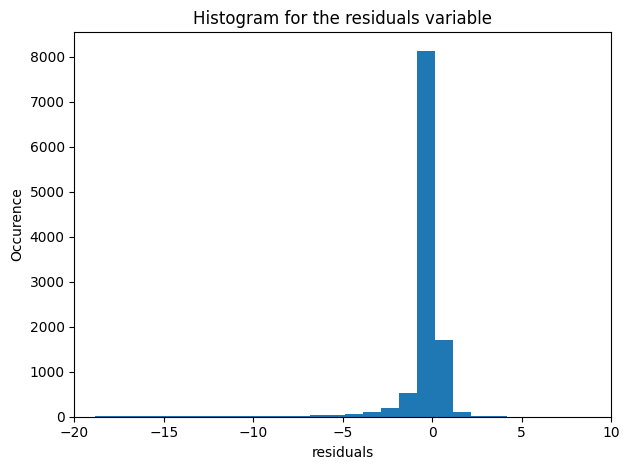

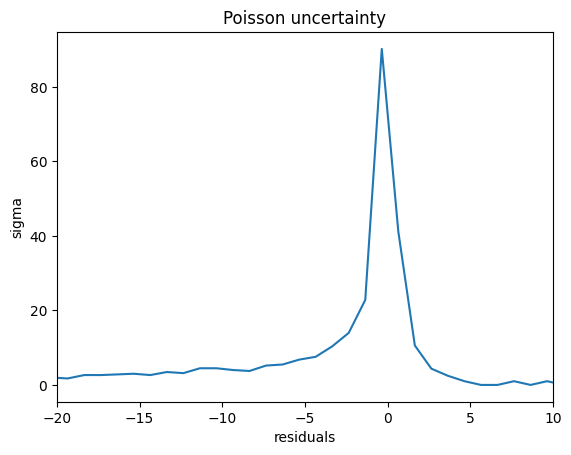

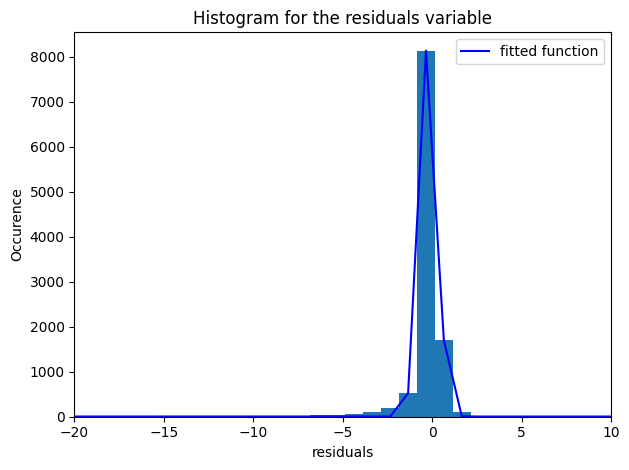

In [4]:
import pickle
import pandas as pd

# Read pickle
filename = "data/residuals_261.pkl"
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()

#Convert the content to a Pandas Dataframe
df = pd.DataFrame(new_dict[()])
df = df['residuals']

#bin = the min and the max value distance
bins=np.arange(df.min(), df.max())
fig = plt.figure() # create the figure and the axes
h, bins, patches = plt.hist(df, bins=bins)
plt.xlim(-20, 10)
plt.title('Histogram for the residuals variable')
plt.xlabel('residuals')
plt.ylabel('Occurence')
fig.tight_layout()

#Poisson uncertainty
#array of bin centers
x = (bins[:-1] + bins[1:]) / 2
sigma = np.sqrt(h)

#Plotting poisson uncertainty
fig1 = plt.figure()
plt.plot(x, sigma)
plt.xlim(-20, 10)
plt.title('Poisson uncertainty')
plt.xlabel('residuals')
plt.ylabel('sigma')
fig.tight_layout()

#The poisson uncertainty follows a gaussian function
#The gaussian function
def func(x, a, offset,x0, sigma ):
    return offset + a*stats.norm.pdf(x, x0, sigma)

#Sigma 
sigma_fit = np.sqrt(np.var(h))

#Amplitude
ampl = abs(h.max() - h.min())

#Fit the gaussian function to the data
popt, pcov = optimize.curve_fit(func, x , h, p0=[ampl, h.min(), np.mean(h), sigma_fit], full_output=False)
#Display the fit
fig = plt.figure() # create the figure and the axes
h, bins, patches = plt.hist(df, bins=bins)
plt.xlim(-20, 10)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), color='blue', label='fitted function')
plt.legend(loc='best')
ax = fig.axes[0]
ax.set_title('Histogram for the residuals variable')
ax.set_xlabel('residuals')
ax.set_ylabel('Occurence')

fig.tight_layout()

# set the number of degrees of freedom
ndof = len(x) - 1

# calculate the chi^2
h_hat = func(x, popt[0], popt[1], popt[2], popt[3])

chi2 = np.sum(((h - h_hat)**2) / sigma)
print("chi2 =", chi2)

# calculate the p-value from the chi^2, the n.d.o.f., and the cumulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) 

# I have a problem because sigma = 0 so we have an inf answer

#Other techniques
ssr = np.sum((func(x, popt[0], popt[1], popt[2], popt[3]) - h)**2)
tss = np.sum((np.mean(h) - h)**2)

rsq = 1 - ssr / tss
print("R2 =", rsq, "\nR =", np.sqrt(rsq))

#R is close to 1, we can see that the fit is satisfactory


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

a =  9.99725714552533
b =  9.182847153692489
c =  9.253976706421431
Average temperature in munich 9.254051149780702
Hottest day of the year in munich :  19.251089419090274
Coldest day of the year in munich :  -0.7432744312281248
RSS for f 0.7870790208625711
RSS for g 0.787133002042815
Fisher F-test
p-value: 0.497 , additional parameter necessary: NO


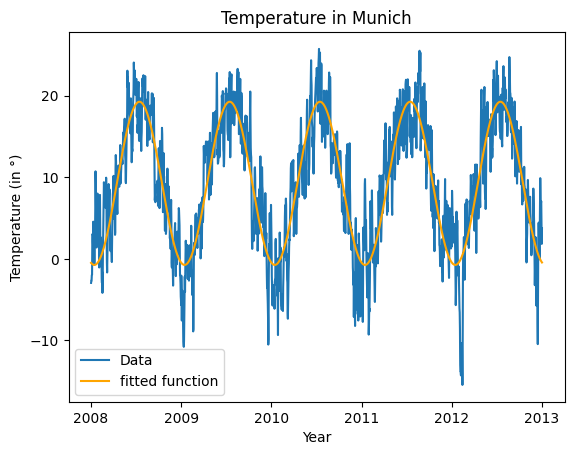

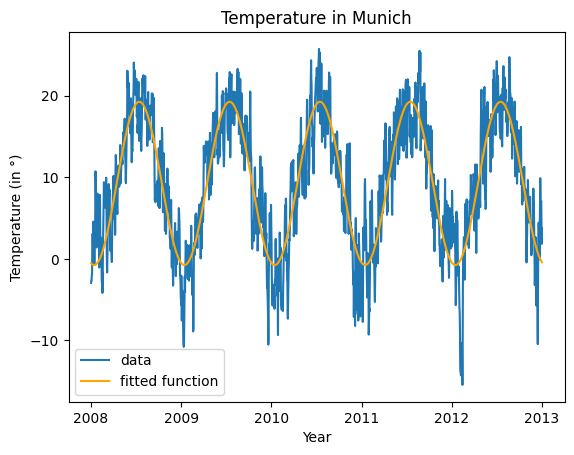

In [5]:

#Read the data
df = pd.read_csv('data/munich_temperatures_average_with_bad_data.txt', delimiter = " ", names=["Date", "Temperature"])
df = df[(df['Date'] >= 2008) & (df['Date'] < 2013)]

#We delete the noise (temperature of 99)
df = df[df['Temperature'] < 90]

fig = plt.figure()
plt.plot(df['Date'], df['Temperature'], label="Data")
plt.title("Temperature in Munich")
plt.xlabel("Year")
plt.ylabel("Temperature (in °)")


#Function
def func(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

temp = df['Temperature']
x = df['Date']

#b 
b = np.mean(temp) 

#Fit the function to the data
popt, pcov = optimize.curve_fit(func, x, temp, p0=[21, b, 0], full_output=False)

#Display the fit
plt.plot(x, func(x, popt[0], popt[1], popt[2]), color='orange', label='fitted function')
plt.legend(loc='best')
f = func(x, popt[0], popt[1], popt[2])
         
#Best fit values of the parameters
print('a = ', popt[0])
print('b = ', popt[1])
print('c = ', popt[2])

#Average temperature in munich
print('Average temperature in munich', b)
print('Hottest day of the year in munich : ', f.max())
print('Coldest day of the year in munich : ', f.min())

#b is the phase at the origin, it allows to change the place of the cosinus
#from left to right (so depending of the time)

def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*t*b + c) + d

#Fit the function to the data
popt_g, pcov_g = optimize.curve_fit(g, x, temp, p0=[21, 1, np.mean(temp), 0], full_output=False)

fig = plt.figure()
plt.plot(df['Date'], df['Temperature'], label="data")
plt.plot(x, g(x, popt_g[0], popt_g[1], popt_g[2], popt_g[3]), color='orange', label='fitted function')
plt.title("Temperature in Munich")
plt.xlabel("Year")
plt.ylabel("Temperature (in °)")
plt.legend(loc='best')

g = g(x, popt_g[0], popt_g[1], popt_g[2], popt_g[3])

#Computing the RSS
ssr_f = np.sum((f - temp)**2)
tss_f = np.sum((np.mean(temp) - temp)**2)

rsq_f = 1 - ssr_f / tss_f
print('RSS for f', rsq_f)

#RSS for g
ssr_g = np.sum((g - temp)**2)
tss_g = np.sum((np.mean(temp) - temp)**2)

rsq_g = 1 - ssr_g / tss_g
print('RSS for g', rsq_g)

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

print("Fisher F-test")
alpha = 0.05;
ftest = Ftest(ssr_f, ssr_g, 3-1, 4-1, df['Date'].size, verbose=True)

#Thanks to the Fisher-F test, we can see that additional parameter is not motivated
#we need to keep the function f has a better fit